In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [42]:
# extract the features and target variable
X = df.drop('MedHouseVal', axis=1).values
y = df['MedHouseVal'].values

X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = np.c_[np.ones(X.shape[0]), X]

X

array([[ 1.        ,  2.34476576,  0.98214266, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 1.        ,  2.33223796, -0.60701891, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.        ,  1.7826994 ,  1.85618152, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [ 1.        , -1.14259331, -0.92485123, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [ 1.        , -1.05458292, -0.84539315, ..., -0.09122515,
         1.77823747, -0.87362627],
       [ 1.        , -0.78012947, -1.00430931, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [44]:
alpha = 0.0001
epochs = 10000

theta = np.random.randn(X.shape[1])

theta

array([ 1.2640623 , -1.11267167, -1.39526065,  1.18191653, -0.04556612,
       -0.62269492, -0.67088434, -0.21165383, -0.37116636])

In [45]:
def gradient_descent(X, y, theta, alpha, epochs):
  m = len(y)
  errors = []
  for _ in range(epochs):

    predictions = X.dot(theta)

    error = (1/m) * np.sum((predictions - y) ** 2)
    errors.append(error)

    gradient = (2/m) * X.T.dot(X.dot(theta) - y)

    theta = theta - alpha * gradient

  return theta, errors

theta, errors = gradient_descent(X, y, theta, alpha, epochs)

theta

array([ 1.95970327,  0.19649903, -0.14237828,  0.73449478, -0.65593448,
       -0.19893402, -0.08683302, -0.60248568, -0.50412238])

In [46]:
predictions = X.dot(theta)

# print the first 5 predictions along with the actual values and differences
predictions[:5], y[:5], predictions[:5] - y[:5]

print("Actual vs Predicted")
print(np.c_[y[:5], predictions[:5]])

Actual vs Predicted
[[4.526      3.07654004]
 [3.585      2.79238836]
 [3.521      3.13841998]
 [3.413      2.23222866]
 [3.422      2.17499916]]


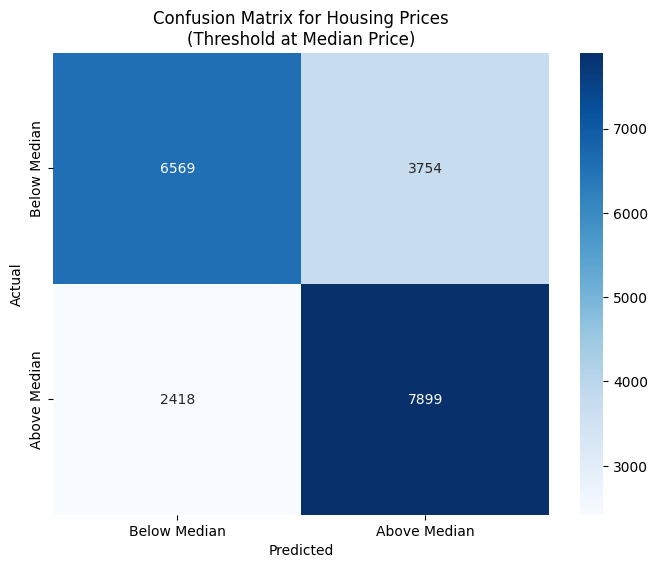


Accuracy: 0.701
Precision: 0.678
Recall: 0.766
F1 Score: 0.719


In [47]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Convert continuous values to binary classes using median as threshold
median_price = np.median(y)
y_true_binary = y > median_price
y_pred_binary = predictions > median_price

# Calculate confusion matrix
cm = confusion_matrix(y_true_binary, y_pred_binary)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Below Median', 'Above Median'],
            yticklabels=['Below Median', 'Above Median'])

plt.title('Confusion Matrix for Housing Prices\n(Threshold at Median Price)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"\nAccuracy: {accuracy_score(y_true_binary, y_pred_binary):.3f}")
print(f"Precision: {precision_score(y_true_binary, y_pred_binary):.3f}")
print(f"Recall: {recall_score(y_true_binary, y_pred_binary):.3f}")
print(f"F1 Score: {f1_score(y_true_binary, y_pred_binary):.3f}")

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y, predictions)))
print("R2 Score:", r2_score(y, predictions))

MSE: 0.898325656839873
RMSE: 0.94780043091353
R2 Score: 0.3253535696062839


0.8983921419974333

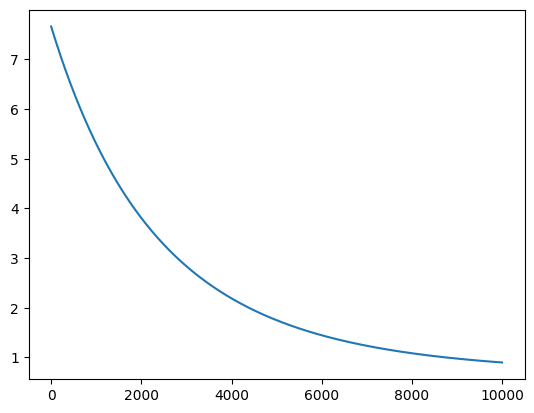

In [49]:
from matplotlib import pyplot as plt

# plot the error curve so we can see the descent
plt.plot(errors)

errors[-1]